### Business Problem

I'm working, with my 17 year old son,   
on a domestic business problem.  

My son is almost ready to buy his first car.  
I'd really like for him to be able to get someting better than my first car.



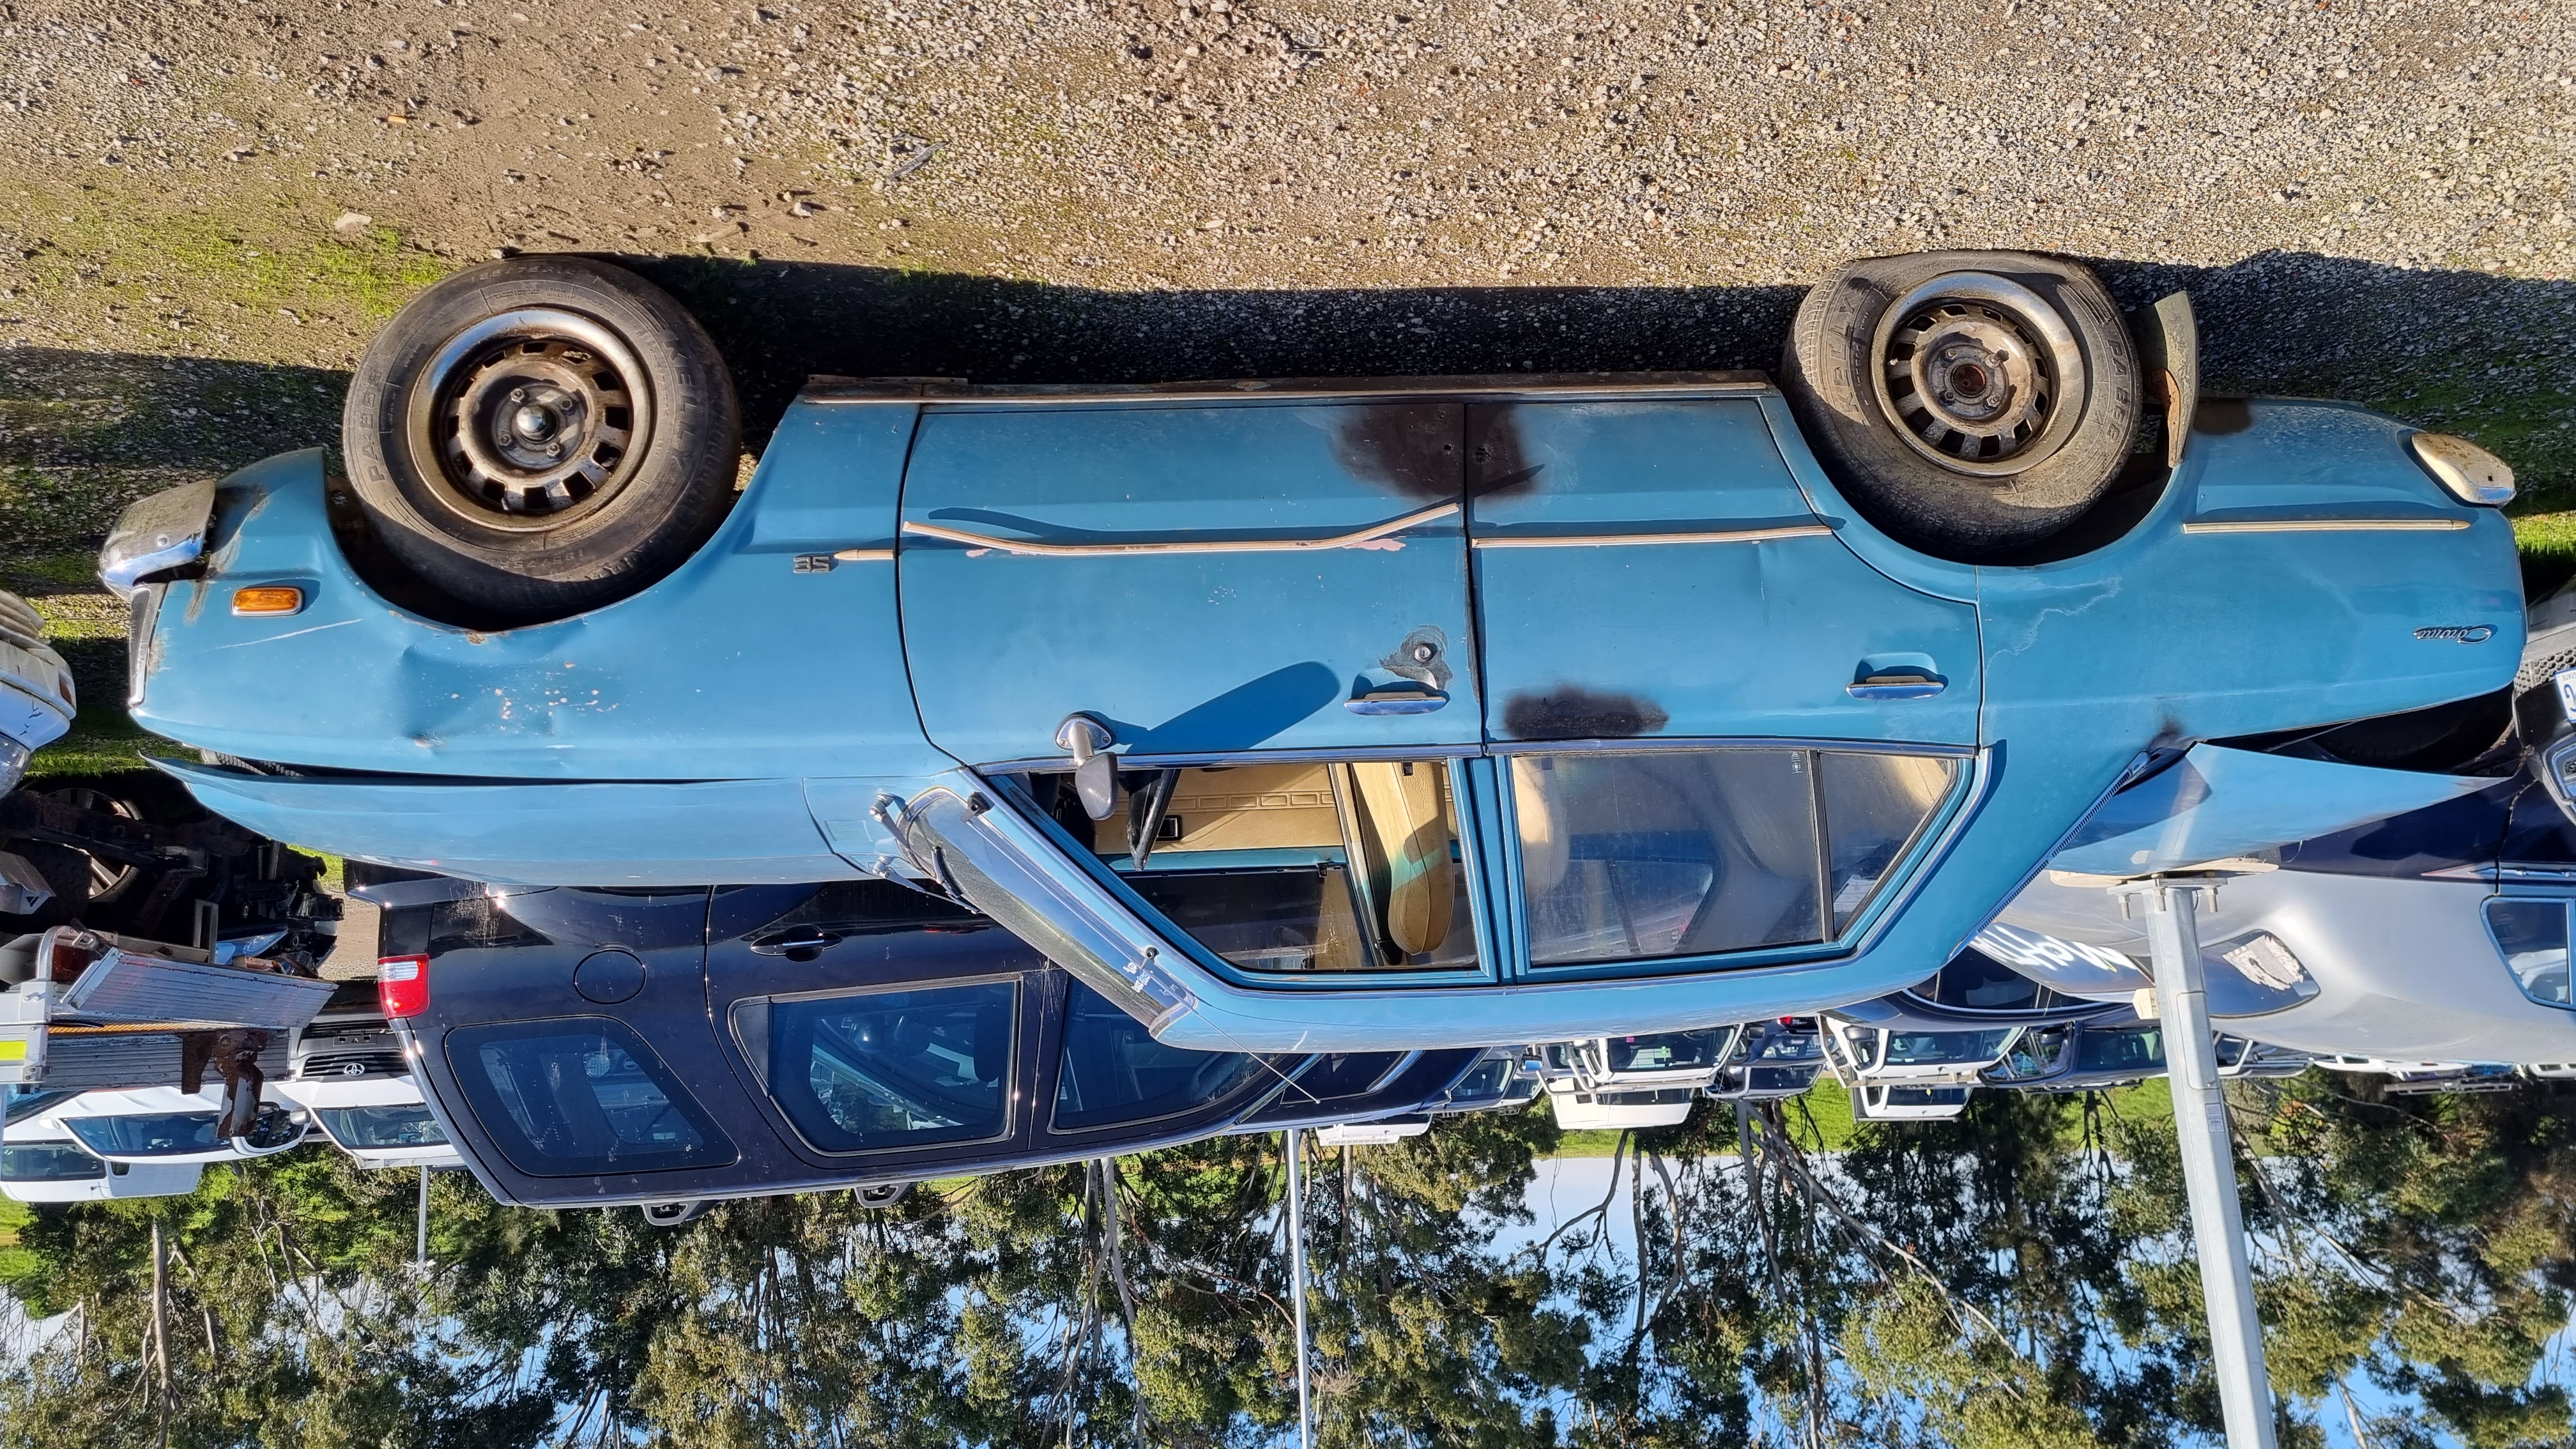

I want to be able to offer him some fatherly advice about how to get something safer  
and then also hopefully beter value than this.  

but we're still trying to work out what he wants to get. 

Lets have a look at the data:...

### Load data

In [1]:
import pandas as pd

I found this data on Kaggle.com  
It was well reviewed and relevant to my problem.  

https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices

In [2]:
avp = pd.read_csv('data/Australian Vehicle Prices.csv')
avp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

### Target

So far my son's best idea for a car,
is that he would like to get a Toyota Supra.

<img src="Supra.jpg" width="750" height="450">

It's a great looking car for sure,  
but I'm not sure it is in our price range.


Lets check out the value of a Supra first

In [3]:
Supra_options = avp.loc[avp["Model"] == 'Supra']
Supra_options[['Year', 'Model', 'Title', 'Price']]

Year  Model                                             Title   Price
7588   2022.0  Supra            2022 Toyota Supra GTS +alcantara Seats   95888
8661   2021.0  Supra                             2021 Toyota Supra GTS   97990
12246  2020.0  Supra                             2020 Toyota Supra GTS   87990
12261  2021.0  Supra            2021 Toyota Supra GTS +alcantara Seats   94995
15491  2023.0  Supra  2023 Toyota Supra GTS +alcant Seats +matte Paint  102000
15670  1993.0  Supra                                 1993 Toyota Supra   69880
15971  1994.0  Supra                      1994 Toyota Supra TURBO 1994   77888

Yep, even that 1993 Supra at $69,880  
Is still way above our price range!   
  
I may need to manage his expectations.  

    
Im going to go ahead and remove anything less than $20,000 as a less unrealistic upper limit of our budget.  
but first I'll need to make sure the Price column is numeric.  
and generally tidy up the data a bit.

In [4]:
avp = avp.drop(avp[avp['Price'] == "POA"].index)

In [5]:
avp['Price'] = pd.to_numeric(avp['Price'])

In [6]:
avp = avp[avp['Price'] <= 20000]  
avp

Brand    Year      Model         Car/Suv  \
1              MG  2022.0        MG3       Hatchback   
5          Toyota  2004.0     Estima  ON FOUR WHEELS   
7          Nissan  2000.0     Pulsar       Hatchback   
9           Honda  2014.0       Jazz       Hatchback   
12          Honda  2015.0       City  USED Dealer ad   
...           ...     ...        ...             ...   
16716      Holden  2014.0      Cruze       Hatchback   
16717  Mitsubishi  2018.0  Outlander             SUV   
16721     Hyundai  2016.0     Accent       Hatchback   
16722     Hyundai  2016.0     Accent           Sedan   
16724      Nissan  2009.0     Navara      Ute / Tray   

                                                   Title UsedOrNew  \
1              2022 MG MG3 Auto Excite (with Navigation)      USED   
5                           2004 Toyota Estima T EDITION      USED   
7                                  2000 Nissan Pulsar LX      USED   
9                                 2014 Honda Jazz Hybrid      USED   
12     2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...      USED   
...                                                  ...       ...   
16716                           2014 Holden Cruze Equipe      USED   
16717     2018 Mitsubishi Outlander ES Adas 5 Seat (2WD)      USED   
16721                         2016 Hyundai Accent Active      USED   
16722                         2016 Hyundai Accent Active      USED   
16724                        2009 Nissan Navara ST (4X4)      USED   

      Transmission        Engine DriveType  FuelType  FuelConsumption  \
1        Automatic  4 cyl, 1.5 L     Front   Premium   6.7 L / 100 km   
5        Automatic             -     Other  Unleaded                -   
7        Automatic  4 cyl, 1.6 L     Front  Unleaded     8 L / 100 km   
9        Automatic  4 cyl, 1.3 L     Front    Hybrid   4.5 L / 100 km   
12       Automatic             -     Other  Unleaded                -   
...            ...           ...       ...       ...              ...   
16716    Automatic  4 cyl, 1.8 L     Front  Unleaded   7.4 L / 100 km   
16717    Automatic  4 cyl, 2.4 L     Front  Unleaded   6.8 L / 100 km   
16721       Manual  4 cyl, 1.4 L     Front  Unleaded   5.9 L / 100 km   
16722    Automatic  4 cyl, 1.4 L     Front  Unleaded   6.4 L / 100 km   
16724    Automatic  4 cyl, 2.5 L       4WD    Diesel  10.5 L / 100 km   

      Kilometres   ColourExtInt             Location CylindersinEngine  \
1             16  Black / Black       Brookvale, NSW             4 cyl   
5         160230       Grey / -     Saint Marys, NSW                 -   
7         300539     Red / Grey  Wentworthville, NSW             4 cyl   
9          38229       Blue / -        Lidcombe, NSW             4 cyl   
12        181745      Black / -      Rouse Hill, NSW                 -   
...          ...            ...                  ...               ...   
16716     119494       Grey / -      Point Cook, VIC             4 cyl   
16717     142169      White / -           Wacol, QLD             4 cyl   
16721      85000       Blue / -    Slacks Creek, QLD             4 cyl   
16722      97610      White / -       Mansfield, QLD             4 cyl   
16724     182254      White / -   Bacchus Marsh, VIC             4 cyl   

         BodyType     Doors     Seats    Price  
1       Hatchback   5 Doors   5 Seats  19990.0  
5      Commercial       NaN       NaN   9990.0  
7       Hatchback   5 Doors   5 Seats   2995.0  
9       Hatchback   5 Doors   5 Seats  17900.0  
12            NaN       NaN       NaN  11999.0  
...           ...       ...       ...      ...  
16716   Hatchback   5 Doors   5 Seats  11999.0  
16717         SUV   4 Doors   5 Seats  19988.0  
16721   Hatchback   5 Doors   5 Seats  12900.0  
16722       Sedan   4 Doors   5 Seats  13888.0  
16724  Ute / Tray   4 Doors   5 Seats  16000.0  

[4777 rows x 19 columns]

In [7]:
avp = avp.dropna()
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272 entries, 1 to 16724
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              4272 non-null   object 
 1   Year               4272 non-null   float64
 2   Model              4272 non-null   object 
 3   Car/Suv            4272 non-null   object 
 4   Title              4272 non-null   object 
 5   UsedOrNew          4272 non-null   object 
 6   Transmission       4272 non-null   object 
 7   Engine             4272 non-null   object 
 8   DriveType          4272 non-null   object 
 9   FuelType           4272 non-null   object 
 10  FuelConsumption    4272 non-null   object 
 11  Kilometres         4272 non-null   object 
 12  ColourExtInt       4272 non-null   object 
 13  Location           4272 non-null   object 
 14  CylindersinEngine  4272 non-null   object 
 15  BodyType           4272 non-null   object 
 16  Doors              4272 non-

Now, because we are looking at other, non superficial factors in determining the value of a vehicle,  
I'm going to cut out the following columns as not being relevant to our enquiry:   
'Brand', 'Model', 'Title', 'ColourExtInt',  and other irrellevant information such as 'Location'.

In [8]:
avp = avp.drop(columns=['Brand', 'Model', 'Title', 'ColourExtInt', 'Location'])
avp

Year     Car/Suv UsedOrNew Transmission        Engine DriveType  \
1      2022.0   Hatchback      USED    Automatic  4 cyl, 1.5 L     Front   
7      2000.0   Hatchback      USED    Automatic  4 cyl, 1.6 L     Front   
9      2014.0   Hatchback      USED    Automatic  4 cyl, 1.3 L     Front   
15     2012.0   Hatchback      USED    Automatic  4 cyl, 1.4 L     Front   
18     2011.0   Hatchback      USED    Automatic    4 cyl, 2 L      Rear   
...       ...         ...       ...          ...           ...       ...   
16716  2014.0   Hatchback      USED    Automatic  4 cyl, 1.8 L     Front   
16717  2018.0         SUV      USED    Automatic  4 cyl, 2.4 L     Front   
16721  2016.0   Hatchback      USED       Manual  4 cyl, 1.4 L     Front   
16722  2016.0       Sedan      USED    Automatic  4 cyl, 1.4 L     Front   
16724  2009.0  Ute / Tray      USED    Automatic  4 cyl, 2.5 L       4WD   

       FuelType  FuelConsumption Kilometres CylindersinEngine    BodyType  \
1       Premium   6.7 L / 100 km         16             4 cyl   Hatchback   
7      Unleaded     8 L / 100 km     300539             4 cyl   Hatchback   
9        Hybrid   4.5 L / 100 km      38229             4 cyl   Hatchback   
15      Premium   6.2 L / 100 km      55676             4 cyl   Hatchback   
18       Diesel   5.4 L / 100 km      95204             4 cyl   Hatchback   
...         ...              ...        ...               ...         ...   
16716  Unleaded   7.4 L / 100 km     119494             4 cyl   Hatchback   
16717  Unleaded   6.8 L / 100 km     142169             4 cyl         SUV   
16721  Unleaded   5.9 L / 100 km      85000             4 cyl   Hatchback   
16722  Unleaded   6.4 L / 100 km      97610             4 cyl       Sedan   
16724    Diesel  10.5 L / 100 km     182254             4 cyl  Ute / Tray   

          Doors     Seats    Price  
1       5 Doors   5 Seats  19990.0  
7       5 Doors   5 Seats   2995.0  
9       5 Doors   5 Seats  17900.0  
15      5 Doors   5 Seats  14999.0  
18      5 Doors   5 Seats  13999.0  
...         ...       ...      ...  
16716   5 Doors   5 Seats  11999.0  
16717   4 Doors   5 Seats  19988.0  
16721   5 Doors   5 Seats  12900.0  
16722   4 Doors   5 Seats  13888.0  
16724   4 Doors   5 Seats  16000.0  

[4272 rows x 14 columns]

As we are looking at value for money, Fuel consumption is going to be an important variable here.  
But for this to be useful, we need to be sure that we are comparing apples with apples.  
And since we are only really looking at Unleaded fuel vehicles,  
we may as well get rid of any other fuel types from the dataframe.

In [9]:
avp['FuelType'].unique()

array(['Premium', 'Unleaded', 'Hybrid', 'Diesel', 'LPG', 'Electric', '-'],
      dtype=object)

In [10]:
FuelTypes = avp['FuelType'].value_counts()
FuelTypes

FuelType
Unleaded    2617
Diesel       904
Premium      721
Hybrid        12
LPG           12
-              5
Electric       1
Name: count, dtype: int64

We'll keep Unleaded and Premium,   
as Premium is just another type of Unleaded fuel

In [11]:
avp = avp.drop(avp[avp['FuelType'] == 'Diesel'].index) 
avp = avp.drop(avp[avp['FuelType'] == 'Hybrid'].index)
avp = avp.drop(avp[avp['FuelType'] == 'LPG'].index)
avp = avp.drop(avp[avp['FuelType'] == '-'].index)        
# mental note - I'll need to check on how many other '-' values there are in the dataframe.  they might cause problems later.
avp = avp.drop(avp[avp['FuelType'] == 'Electric'].index)

In [12]:
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 1 to 16722
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3338 non-null   float64
 1   Car/Suv            3338 non-null   object 
 2   UsedOrNew          3338 non-null   object 
 3   Transmission       3338 non-null   object 
 4   Engine             3338 non-null   object 
 5   DriveType          3338 non-null   object 
 6   FuelType           3338 non-null   object 
 7   FuelConsumption    3338 non-null   object 
 8   Kilometres         3338 non-null   object 
 9   CylindersinEngine  3338 non-null   object 
 10  BodyType           3338 non-null   object 
 11  Doors              3338 non-null   object 
 12  Seats              3338 non-null   object 
 13  Price              3338 non-null   float64
dtypes: float64(2), object(12)
memory usage: 391.2+ KB


Now we have a dataset with only Unleaded (and Premium) values.  
So i can get rid of 'FuelType' as a variable.

In [13]:
avp = avp.drop(columns=['FuelType'])
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 1 to 16722
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3338 non-null   float64
 1   Car/Suv            3338 non-null   object 
 2   UsedOrNew          3338 non-null   object 
 3   Transmission       3338 non-null   object 
 4   Engine             3338 non-null   object 
 5   DriveType          3338 non-null   object 
 6   FuelConsumption    3338 non-null   object 
 7   Kilometres         3338 non-null   object 
 8   CylindersinEngine  3338 non-null   object 
 9   BodyType           3338 non-null   object 
 10  Doors              3338 non-null   object 
 11  Seats              3338 non-null   object 
 12  Price              3338 non-null   float64
dtypes: float64(2), object(11)
memory usage: 365.1+ KB


Now to drop a few other variables that I dont believe will have much bearing on Price or value

In [14]:
avp = avp.drop(columns=['Car/Suv', 'BodyType', 'Doors', 'Seats'])
avp

Year UsedOrNew Transmission        Engine DriveType FuelConsumption  \
1      2022.0      USED    Automatic  4 cyl, 1.5 L     Front  6.7 L / 100 km   
7      2000.0      USED    Automatic  4 cyl, 1.6 L     Front    8 L / 100 km   
15     2012.0      USED    Automatic  4 cyl, 1.4 L     Front  6.2 L / 100 km   
19     2014.0      USED    Automatic    3 cyl, 1 L     Front  5.4 L / 100 km   
20     2012.0      USED    Automatic  4 cyl, 2.4 L       AWD  7.5 L / 100 km   
...       ...       ...          ...           ...       ...             ...   
16714  2015.0      USED    Automatic  4 cyl, 1.2 L     Front  5.1 L / 100 km   
16716  2014.0      USED    Automatic  4 cyl, 1.8 L     Front  7.4 L / 100 km   
16717  2018.0      USED    Automatic  4 cyl, 2.4 L     Front  6.8 L / 100 km   
16721  2016.0      USED       Manual  4 cyl, 1.4 L     Front  5.9 L / 100 km   
16722  2016.0      USED    Automatic  4 cyl, 1.4 L     Front  6.4 L / 100 km   

      Kilometres CylindersinEngine    Price  
1             16             4 cyl  19990.0  
7         300539             4 cyl   2995.0  
15         55676             4 cyl  14999.0  
19         76289             3 cyl  12400.0  
20        219681             4 cyl  13999.0  
...          ...               ...      ...  
16714      88000             4 cyl  11900.0  
16716     119494             4 cyl  11999.0  
16717     142169             4 cyl  19988.0  
16721      85000             4 cyl  12900.0  
16722      97610             4 cyl  13888.0  

[3338 rows x 9 columns]

In [15]:
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 1 to 16722
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3338 non-null   float64
 1   UsedOrNew          3338 non-null   object 
 2   Transmission       3338 non-null   object 
 3   Engine             3338 non-null   object 
 4   DriveType          3338 non-null   object 
 5   FuelConsumption    3338 non-null   object 
 6   Kilometres         3338 non-null   object 
 7   CylindersinEngine  3338 non-null   object 
 8   Price              3338 non-null   float64
dtypes: float64(2), object(7)
memory usage: 260.8+ KB


I'll need to do a bit of work to get all these columns into numerical format.

In [16]:
columns_to_analyze = ['Year', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Price']

# Dictionary to store unique value counts for each column
unique_value_counts = {}

# Iterate over each column and calculate the number of unique values
for column in columns_to_analyze:
    unique_value_counts[column] = avp[column].nunique()

# Print the unique value counts for each column
for column, count in unique_value_counts.items():
    print(f"{column}: {count}")

Year: 33
UsedOrNew: 3
Transmission: 2
Engine: 52
DriveType: 4
FuelConsumption: 113
Kilometres: 3237
CylindersinEngine: 6
Price: 596


'UsedOrNew', 'Transmission', 'DriveType', and 'CylindersinEngine'  
will be categorical variables.

'Year' as a float is just awkward, let's tidy that up

In [17]:
avp['Year'] = avp['Year'].astype('int64')
#avp

The 'Engine' column is going to be useful,  
for the Engine size,  
I'm going to strip that out,  
and then i don't need the rest, as we already have 'CylindersinEngine' elsewhere.

In [18]:
avp[['Engine1', 'Engine_size']] = avp['Engine'].str.split(',', expand=True)
#avp

In [19]:
avp = avp.drop(columns=['Engine', 'Engine1'])
#avp

In [20]:
avp['Engine_size'] = avp['Engine_size'].str.replace(r' L', '')
#avp

In [21]:
avp['Engine_size'] = pd.to_numeric(avp['Engine_size'])
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 1 to 16722
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3338 non-null   int64  
 1   UsedOrNew          3338 non-null   object 
 2   Transmission       3338 non-null   object 
 3   DriveType          3338 non-null   object 
 4   FuelConsumption    3338 non-null   object 
 5   Kilometres         3338 non-null   object 
 6   CylindersinEngine  3338 non-null   object 
 7   Price              3338 non-null   float64
 8   Engine_size        3338 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 260.8+ KB


Next,  
'FuelConsumption' is going to be extremely useful.  
But not in this format.

In [22]:
avp['FuelConsumption'] = avp['FuelConsumption'].str.extract(r'^([\d.]+)').astype(float)
avp

Year UsedOrNew Transmission DriveType  FuelConsumption Kilometres  \
1      2022      USED    Automatic     Front              6.7         16   
7      2000      USED    Automatic     Front              8.0     300539   
15     2012      USED    Automatic     Front              6.2      55676   
19     2014      USED    Automatic     Front              5.4      76289   
20     2012      USED    Automatic       AWD              7.5     219681   
...     ...       ...          ...       ...              ...        ...   
16714  2015      USED    Automatic     Front              5.1      88000   
16716  2014      USED    Automatic     Front              7.4     119494   
16717  2018      USED    Automatic     Front              6.8     142169   
16721  2016      USED       Manual     Front              5.9      85000   
16722  2016      USED    Automatic     Front              6.4      97610   

      CylindersinEngine    Price  Engine_size  
1                 4 cyl  19990.0          1.5  
7                 4 cyl   2995.0          1.6  
15                4 cyl  14999.0          1.4  
19                3 cyl  12400.0          1.0  
20                4 cyl  13999.0          2.4  
...                 ...      ...          ...  
16714             4 cyl  11900.0          1.2  
16716             4 cyl  11999.0          1.8  
16717             4 cyl  19988.0          2.4  
16721             4 cyl  12900.0          1.4  
16722             4 cyl  13888.0          1.4  

[3338 rows x 9 columns]

In [23]:
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 1 to 16722
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3338 non-null   int64  
 1   UsedOrNew          3338 non-null   object 
 2   Transmission       3338 non-null   object 
 3   DriveType          3338 non-null   object 
 4   FuelConsumption    3338 non-null   float64
 5   Kilometres         3338 non-null   object 
 6   CylindersinEngine  3338 non-null   object 
 7   Price              3338 non-null   float64
 8   Engine_size        3338 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 260.8+ KB


Finally,  
'Kilometres' as integer

In [24]:
avp = avp.drop(avp[avp['Kilometres'] == '-'].index)

In [25]:
avp['Kilometres'] = pd.to_numeric(avp['Kilometres'])
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3335 entries, 1 to 16722
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3335 non-null   int64  
 1   UsedOrNew          3335 non-null   object 
 2   Transmission       3335 non-null   object 
 3   DriveType          3335 non-null   object 
 4   FuelConsumption    3335 non-null   float64
 5   Kilometres         3335 non-null   int64  
 6   CylindersinEngine  3335 non-null   object 
 7   Price              3335 non-null   float64
 8   Engine_size        3335 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 260.5+ KB


Let's take a look at some of these relationships

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

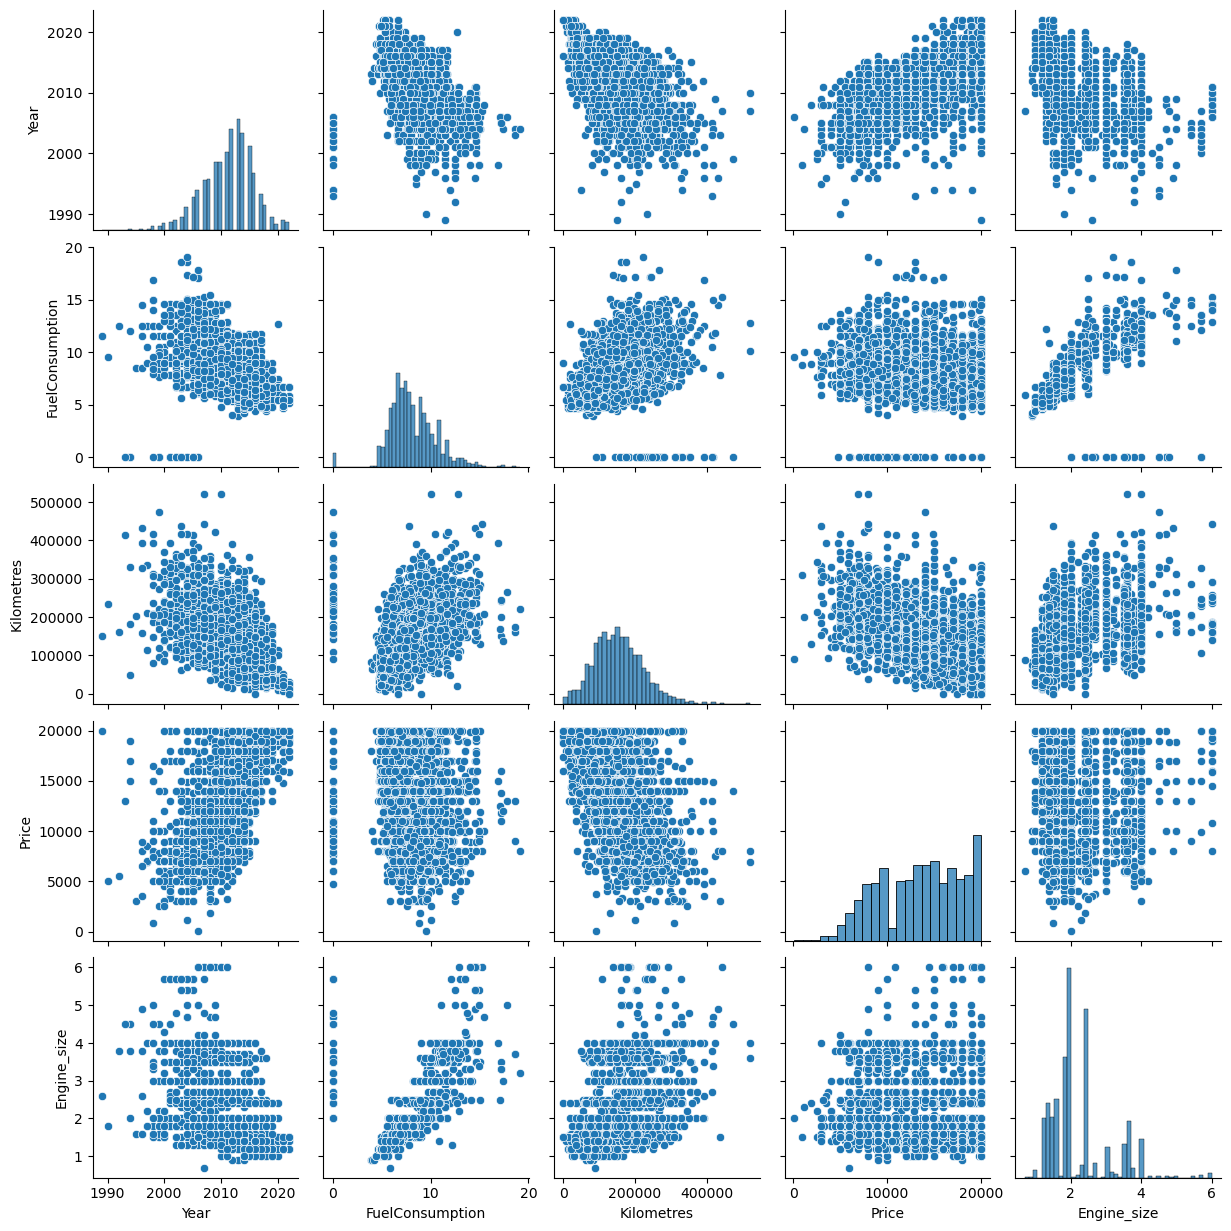

In [27]:
sns.pairplot(avp)
plt.show()

It looks like there are quite a few "0" values in the 'FuelConsumption' column.  
I'd better fix that.

In [28]:
avp = avp.drop(avp[avp['FuelConsumption'] == 0].index)

I'll also take out anything, less than $1000.  
As i dont want to waste any time looking at lemons

In [29]:
avp = avp.drop(avp[avp['Price'] < 1000].index)

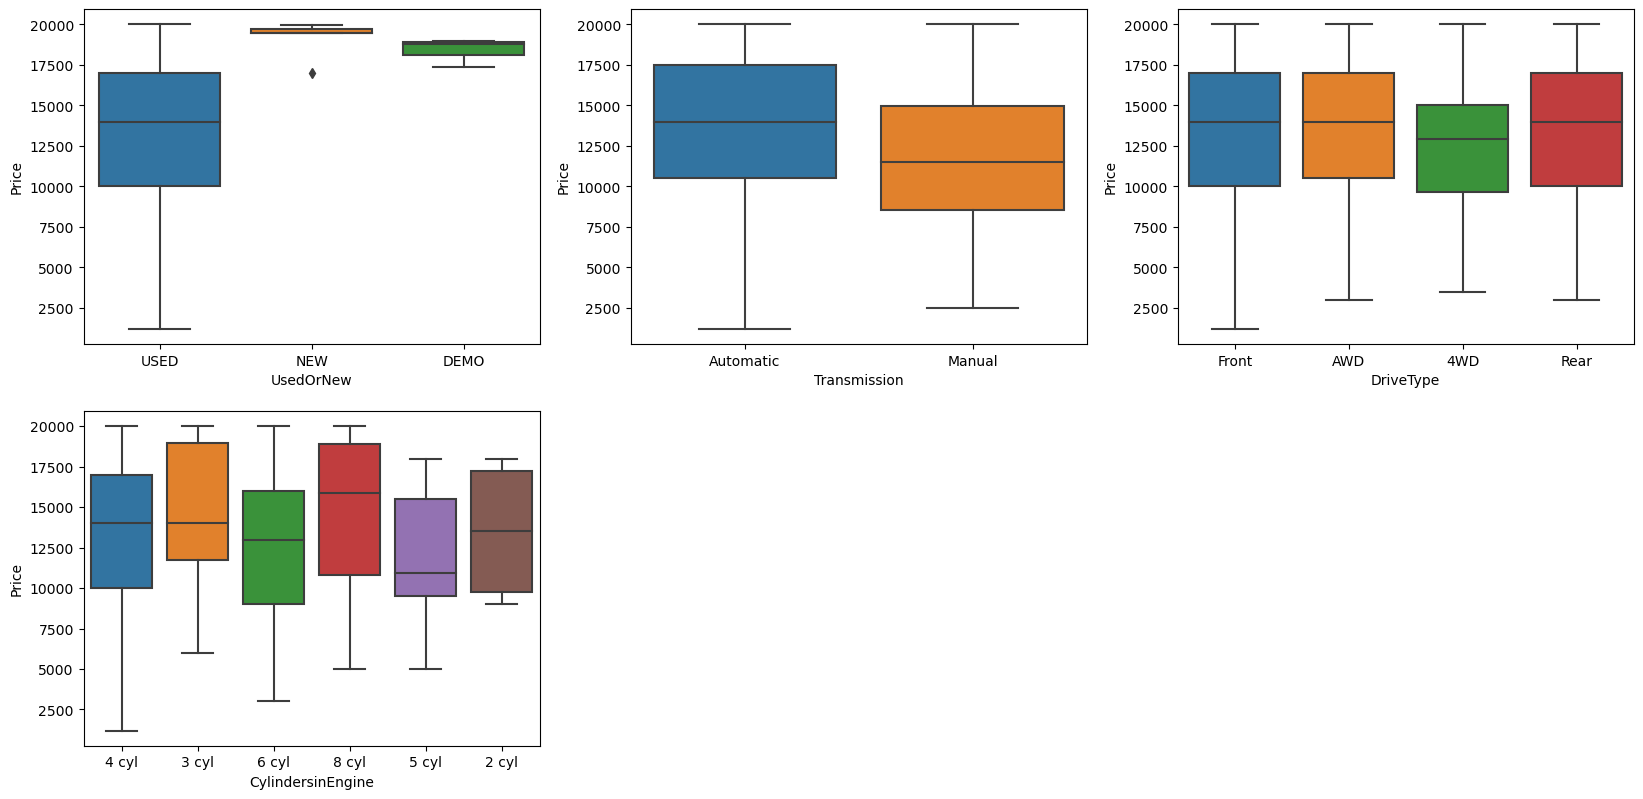

In [30]:
plt.figure(figsize=(20, 20))

plt.subplot(4,3,1)
sns.boxplot(x = 'UsedOrNew', y = 'Price', data = avp)
plt.subplot(4,3,2)
sns.boxplot(x = 'Transmission', y = 'Price', data = avp)
plt.subplot(4,3,3)
sns.boxplot(x = 'DriveType', y = 'Price', data = avp)
plt.subplot(4,3,4)
sns.boxplot(x = 'CylindersinEngine', y = 'Price', data = avp)

plt.show()

I can see from this already, that 'New' and 'Demo' vehicles, are really just outliers within our price range.  
$20,000 was a stretch goal anyway, i may as well remove them and make our search a little more realistic.

In [31]:
avp = avp.drop(avp[avp['UsedOrNew'] == 'NEW'].index) 
avp = avp.drop(avp[avp['UsedOrNew'] == 'DEMO'].index) 

In [32]:
avp = avp.drop(columns=['UsedOrNew'])

In [33]:
avp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3274 entries, 1 to 16722
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3274 non-null   int64  
 1   Transmission       3274 non-null   object 
 2   DriveType          3274 non-null   object 
 3   FuelConsumption    3274 non-null   float64
 4   Kilometres         3274 non-null   int64  
 5   CylindersinEngine  3274 non-null   object 
 6   Price              3274 non-null   float64
 7   Engine_size        3274 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 230.2+ KB


Now finally,   
It is not really 'Price' that i am wanting to show my son , as the target variable.  
I am really trying to demonstrate "Value for money".  

I can do that by making a new column  
which will be a function of 'Price' and 'FuelConsumption',  
'Value' = 'Price' / 'FuelConsumption'

In [34]:
avp['Value'] = avp['Price'] / avp['FuelConsumption']
avp

Year Transmission DriveType  FuelConsumption  Kilometres  \
1      2022    Automatic     Front              6.7          16   
7      2000    Automatic     Front              8.0      300539   
15     2012    Automatic     Front              6.2       55676   
19     2014    Automatic     Front              5.4       76289   
20     2012    Automatic       AWD              7.5      219681   
...     ...          ...       ...              ...         ...   
16714  2015    Automatic     Front              5.1       88000   
16716  2014    Automatic     Front              7.4      119494   
16717  2018    Automatic     Front              6.8      142169   
16721  2016       Manual     Front              5.9       85000   
16722  2016    Automatic     Front              6.4       97610   

      CylindersinEngine    Price  Engine_size        Value  
1                 4 cyl  19990.0          1.5  2983.582090  
7                 4 cyl   2995.0          1.6   374.375000  
15                4 cyl  14999.0          1.4  2419.193548  
19                3 cyl  12400.0          1.0  2296.296296  
20                4 cyl  13999.0          2.4  1866.533333  
...                 ...      ...          ...          ...  
16714             4 cyl  11900.0          1.2  2333.333333  
16716             4 cyl  11999.0          1.8  1621.486486  
16717             4 cyl  19988.0          2.4  2939.411765  
16721             4 cyl  12900.0          1.4  2186.440678  
16722             4 cyl  13888.0          1.4  2170.000000  

[3274 rows x 9 columns]

This new 'Value' represents how much money you are spending per unit of fuel consumption.  
A higher value for money, indicates that you are getting more value (lower price) for each unit of fuel consumption.  
While a lower value for money indicates less value for the money spent on fuel consumption.

'Value' will be our new target variable.

before i go any further, i'd better remove 'Price' and 'FuelConsumption' as variables
as they will cause multicollinearity issues later.

In [35]:
avp_FC_P = avp[['FuelConsumption', 'Price']].copy()

In [36]:
avp_final = avp.drop(columns=['FuelConsumption', 'Price'])

### Step 2: Transform Continuous Variables and Log Transformation of Target Variable

In [37]:
import numpy as np

In [38]:
# Log transformation of the target variable
avp_final['log_Value'] = np.log(avp_final['Value'])

# Specify continuous variables to be transformed (e.g., 'Mileage', 'Engine_Size')
continuous_vars = ['Year', 'Kilometres', 'Engine_size']

# Apply log transformation to selected continuous variables
for var in continuous_vars:
    avp_final[f'log_{var}'] = np.log(avp_final[var])

### Train/Test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split data into training and testing sets
X = avp_final.drop(['Value', 'log_Value'] + continuous_vars, axis=1)
y = avp_final['log_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train

Transmission DriveType CylindersinEngine  log_Year  log_Kilometres  \
4419     Automatic       4WD             6 cyl  7.602900       12.609583   
9385        Manual     Front             4 cyl  7.608374       11.561478   
5929        Manual     Front             4 cyl  7.609862       11.549074   
15895       Manual       AWD             4 cyl  7.600402       12.521409   
10531    Automatic     Front             4 cyl  7.606885       11.564255   
...            ...       ...               ...       ...             ...   
4740     Automatic     Front             4 cyl  7.606885       11.268941   
4924     Automatic     Front             4 cyl  7.607381       11.639734   
5844     Automatic      Rear             6 cyl  7.606885       11.701966   
3381     Automatic     Front             4 cyl  7.608374       11.460168   
15997    Automatic       4WD             6 cyl  7.604396       12.241401   

       log_Engine_size  
4419          1.193922  
9385          0.182322  
5929          0.693147  
15895         0.693147  
10531         0.405465  
...                ...  
4740          0.916291  
4924          0.693147  
5844          1.386294  
3381          0.587787  
15997         1.098612  

[2291 rows x 6 columns]

Step 3: Preprocessing (Including Dummy Encoding for Categorical Variables)

In [42]:
# Identify categorical variables
categorical_vars = ['Transmission', 'DriveType', 'CylindersinEngine']
# Create dummy variables for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=categorical_vars, drop_first=True, dtype=np.int64)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_vars, drop_first=True, dtype=np.int64)


### 1st Iteration
Fit OLS Regression Model

In [43]:
import statsmodels.api as sm

In [44]:
# Add constant term to the independent variables for OLS regression
X_train_model1 = sm.add_constant(X_train_encoded)

# Fit OLS model
ols_model1 = sm.OLS(y_train, X_train_model1)
ols_results1 = ols_model1.fit()

# Print summary of the OLS regression results
print(ols_results1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Value   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     445.4
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        06:37:50   Log-Likelihood:                -209.15
No. Observations:                2291   AIC:                             444.3
Df Residuals:                    2278   BIC:                             518.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_model1.columns
vif['VIF'] = [variance_inflation_factor(X_train_model1.values, i) for i in range(X_train_model1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features          VIF
0                     const  19404227.17
9   CylindersinEngine_4 cyl       399.38
11  CylindersinEngine_6 cyl       350.37
8   CylindersinEngine_3 cyl        50.24
12  CylindersinEngine_8 cyl        29.45
10  CylindersinEngine_5 cyl         9.09
3           log_Engine_size         4.08
6           DriveType_Front         3.88
7            DriveType_Rear         2.49
5             DriveType_AWD         2.05
2            log_Kilometres         1.50
1                  log_Year         1.48
4       Transmission_Manual         1.05

There is clearly some significant multicollinearity.  
I'll get rid of a few highly correlated pairs.

In [47]:
df = X_train_model1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.5) & (df.cc<1)]

cc
pairs                                                       
(CylindersinEngine_4 cyl, CylindersinEngine_6 cyl)  0.888923
(log_Engine_size, CylindersinEngine_6 cyl)          0.715344
(CylindersinEngine_4 cyl, log_Engine_size)          0.658813
(DriveType_Front, log_Engine_size)                  0.615525
(DriveType_Front, DriveType_Rear)                   0.609671
(log_Kilometres, log_Year)                          0.506714

I'll get rid of 'CylindersinEngine_6 cyl', 'CylindersinEngine_4',   
and see what that does

Also all those 'Cylinders' categorical variables have very high P values,  
number of cylinders must be highly correlated with Engine size, which makes sense.  
'DriveType_AWD' also has a high P value.  
I'll get rid of them too.

In [48]:
X_train_model2 = X_train_model1.drop(columns=['CylindersinEngine_6 cyl'])

### 2nd Iteration

In [49]:
# Fit OLS model
ols_model2 = sm.OLS(y_train, X_train_model2)
ols_results2 = ols_model2.fit()

# Print summary of the OLS regression results
print(ols_results2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Value   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     486.1
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        06:37:51   Log-Likelihood:                -209.16
No. Observations:                2291   AIC:                             442.3
Df Residuals:                    2279   BIC:                             511.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [50]:
X_train_model3 = X_train_model2.drop(columns=['CylindersinEngine_3 cyl', 'DriveType_AWD', 'CylindersinEngine_5 cyl', 'DriveType_Rear'])

### 3rd Iteration

In [51]:
# Fit OLS model
ols_model3 = sm.OLS(y_train, X_train_model3)
ols_results3 = ols_model3.fit()

# Print summary of the OLS regression results
print(ols_results3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Value   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     761.4
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        06:37:51   Log-Likelihood:                -213.18
No. Observations:                2291   AIC:                             442.4
Df Residuals:                    2283   BIC:                             488.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [52]:
# Calculate MSE and R-squared for the train model
y_pred_train_log = ols_results3.predict(X_train_model3)
#y_pred_train = np.exp(y_pred_train_log)

mse_train = mean_squared_error((y_train), y_pred_train_log)
r_squared_train = r2_score((y_train), y_pred_train_log)

print("Train Model Summary:")
print("Mean Squared Error (MSE) on training data:", mse_train)
print("R-squared on training data:", r_squared_train)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Use the fitted OLS model to make predictions on the test set
X_test_final = sm.add_constant(X_test_encoded)  # Add constant term to test set
y_pred_log = ols_results3.predict(X_test_final[['const', 'log_Year','log_Kilometres','log_Engine_size','Transmission_Manual','DriveType_Front','CylindersinEngine_4 cyl', 'CylindersinEngine_8 cyl']])

In [ ]:
# Evaluate model performance using metrics such as RMSE and R-squared on the original scale
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error((y_test), y_pred_log)
rmse = np.sqrt(mse)
r_squared = r2_score((y_test), y_pred_log)

print("Test Model Summary:")
print("Mean Squared Error on testing data:", rmse)
print("R-squared:", r_squared)

In [ ]:
# Visualization of True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_log, color='skyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='salmon', linewidth=2)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

NameError: name 'y_pred_log' is not defined

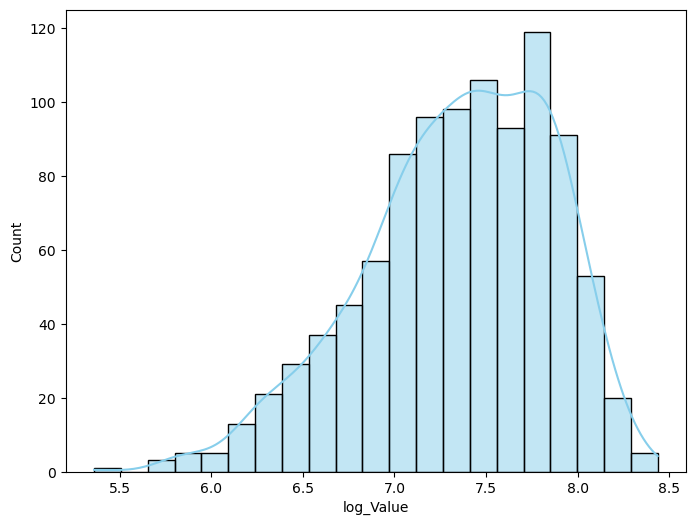

In [53]:
# Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='skyblue', kde=True, label='True Values')
sns.histplot(y_pred_log, color='salmon', kde=True, label='Predicted Values')
plt.title('Distribution of True vs. Predicted Values')
plt.legend()
plt.show()

I am happy with the ability for my model to predict the Value of a vehicle based on various factors.  
Lets have another look at my final model.

In [54]:
print(ols_results3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Value   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     761.4
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        06:37:52   Log-Likelihood:                -213.18
No. Observations:                2291   AIC:                             442.4
Df Residuals:                    2283   BIC:                             488.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Findings

#### 1. Year of Manufacture
The year of manufacture has a huge influence on the perceived value of a vehicle.
The higher the year of manufacture, the newer the vehicle.  
Fuel economy of vehicles is becoming more important for consumers.  
this result may also demonstrate improvements in fuel economy engineering over time.
so it makes sense that this would be a high influencing factor.  

I will certainly be advising my son to buy the newest car he can possibly afford.

#### 2. Engine Size
Engine size is the next most influencial variable on the value of a vehicle.  
It is a negative effect,  
being that the higher the engine size, the lower the value.
This also makes sense.  

I will advise my son to try to find a vehicle with a lower engine size   
(at least for your first car, Please)

#### 3. <s>CylindersEngine_8 cyl</s>

I am choosing to ignore CylindersinEngine_8 cyl's influence on the value of a vehicle,   
and choose to consider this a statistical outlier.

#### Further findings.
* It is interesting that manual vehicles are negatively correlated with value.  
It might be interesting to investigate why this is.  it may also just be a statistical outlier.  
in any case we will most likely be looking at Automatic transmission vehicles, as this is the majority on the market.
* Perhaps avoid Front wheel drive
* Generally look for 4 cylinder vehicles.